In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("all-data.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
df.rename(columns = {'neutral' : 'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'},inplace = True)

In [5]:
df.head()

,sentiment,statement
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [6]:
df.shape

(4845, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   statement  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [8]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [9]:
df.drop_duplicates(subset = ['statement'],keep = 'first',inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [11]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,Technopolis plans to develop in stages an area...
freq,2871,1


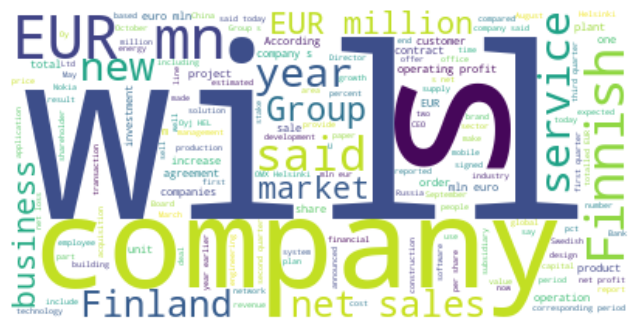

In [12]:
text = " ".join([x for x in df.statement])
wordcloud = WordCloud(background_color = 'white').generate(text)

plt.figure(figsize = (8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

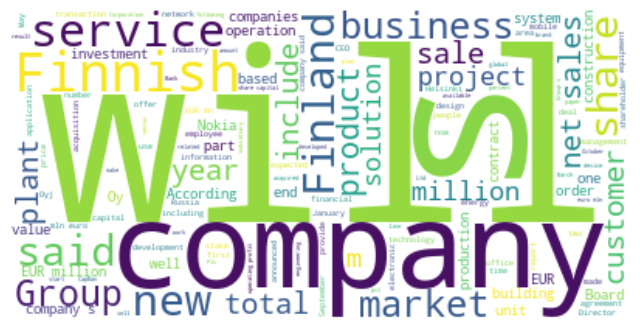

In [13]:
text = " ".join([x for x in df.statement[df.sentiment == 'neutral']])
wordcloud = WordCloud(background_color = 'white').generate(text)

plt.figure(figsize = (8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

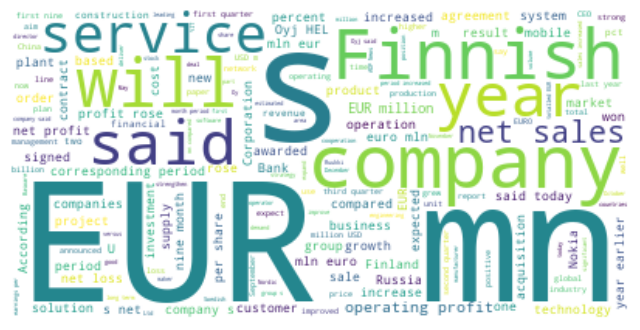

In [14]:
text = " ".join([x for x in df.statement[df.sentiment == 'positive']])
wordcloud = WordCloud(background_color = 'white').generate(text)

plt.figure(figsize = (8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

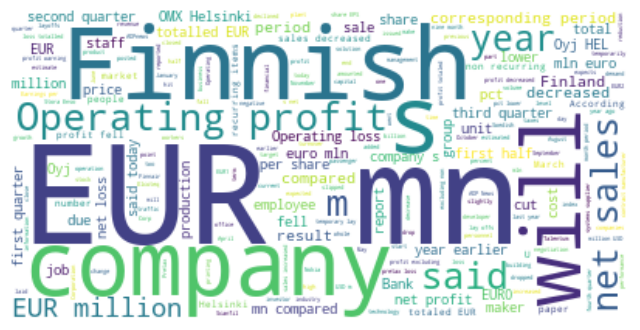

In [15]:
text = " ".join([x for x in df.statement[df.sentiment == 'negative']])
wordcloud = WordCloud(background_color = 'white').generate(text)

plt.figure(figsize = (8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

In [17]:
train,eva = train_test_split(df,test_size = 0.2)

In [18]:
!pip install simpletransformers


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip install transformers==4.24.0


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from simpletransformers.classification import ClassificationModel

model = ClassificationModel('bert','bert-base-cased',num_labels = 3,args={'reprocess_input_data':True,'overwrite_output_dir':True},use_cuda=False)

C:\Users\Nischal\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint

In [21]:
 def making_label(st):
        if(st == 'positive'):
            return 0
        elif(st == 'neutral'):
            return 2
        else:
            return 1

train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


In [22]:
train.tail()

,sentiment,statement,label
1804,neutral,Fortum needs a clear signal of commitment from...,2
433,neutral,Increase in the number of shares is based on t...,2
283,positive,That would be an increase from estimated sales...,0
2114,neutral,"In 2006 , TeliaSonera net sales were SEK 91 bn...",2
208,positive,"Svyturys-Utenos Alus , which is controlled by ...",0


In [23]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n',' ',regex = True),
    'label': train['label'][:1500]
})

In [24]:
eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n',' ',regex = True),
    'label': eva['label'][-400:]
})

In [25]:
model.train_model(train_df)

C:\Users\Nischal\AppData\Local\Programs\Python\Python311\Lib\site-packages\simpletransformers\classification\classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
Epochs 0/1. Running Loss:    1.0903:  16%|███████                                     | 30/188 [02:38<14:23,  5.47s/it]


Epochs 0/1. Running Loss:    0.6837:  34%|██████████████▋                             | 63/188 [05:24<10:14,  4.92s/it]


Epochs 0/1. Running Loss:    1.1295:  51%|██████████████████████▍                     | 96/188 [08:11<07:44,  5.05s/it]


Epochs 0/1. Running Loss:    0.8272:  69%|█████████████████████████████▌             | 129/188 [11:02<05:04,  5.16s/it]


Epochs 0/1. Running Loss:    1.0472:  86%|█████████████████████████████████████      | 162/188 [13:55<02:13,  5.14s/it]


Epoch 1 of 1: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [16:10<00:00, 970.95s/it]


(188, 0.814635125840915)

In [26]:
result,model_outputs,wrong_predictions = model.eval_model(eval_df)

C:\Users\Nischal\AppData\Local\Programs\Python\Python311\Lib\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
Running Evaluation: 100%|██████████████████████████████████████████████████████████████| 50/50 [01:23<00:00,  1.67s/it]


In [27]:
result

{'mcc': 0.480013121478257, 'eval_loss': 0.6822423815727234}

In [28]:
model_outputs

array([[ 0.37824816, -1.28986931,  0.80616868],
       [-1.09873772, -2.16542506,  2.30914807],
       [-0.88710344, -1.99890983,  2.33917332],
       ...,
       [ 0.20163789, -1.42815089,  0.95547354],
       [-1.21550691, -1.97945595,  2.23302197],
       [-0.62946731, -2.05244875,  2.11167789]])

In [29]:
lst = []
for arr in model_outputs:
  lst.append(np.argmax(arr))  

In [30]:
true = eval_df['label'].tolist()
predicted = lst

In [31]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true,predicted)

In [32]:
mat

array([[ 81,   0,  29],
       [ 44,   0,   9],
       [ 32,   0, 205]], dtype=int64)

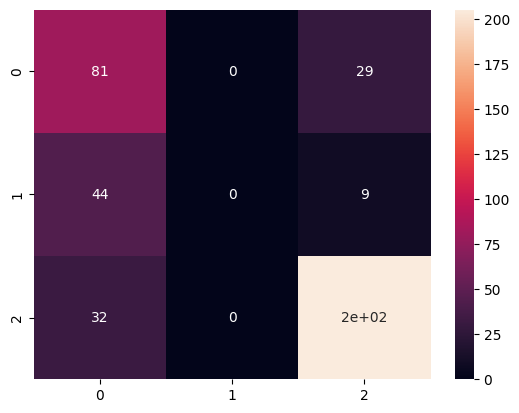

In [33]:
df_cm = pd.DataFrame(matb,range(3),range(3))

sns.heatmap(df_cm,annot=True)
plt.show()

In [34]:
sklearn.metrics.classification_report(true,predicted,target_names = ['positive','neutral','negative'])

C:\Users\Nischal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nischal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nischal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

'              precision    recall  f1-score   support\n\n    positive       0.52      0.74      0.61       110\n     neutral       0.00      0.00      0.00        53\n    negative       0.84      0.86      0.85       237\n\n    accuracy                           0.71       400\n   macro avg       0.45      0.53      0.49       400\nweighted avg       0.64      0.71      0.67       400\n'

In [35]:
sklearn.metrics.accuracy_score(true,predicted)

0.715

Give your Statement

In [36]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return

In [ ]:
get_resilt("According to Gran, the company has no plane to move all production to Russia, although")